In [ ]:
# Project#1-2: BOSCH Datasets Multi-Output Gaussian Regression (MOGP)
# Class: Industrial AI & Automation
# Author: GYEONHEAL AN(21900416), GARMA JIN(21900727)
# Date: 2024-10-29

In [1]:
import pandas as pd
import numpy as np
import GPy
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
X_train = pd.read_csv('X_train.csv').values
Y_train = pd.read_csv('Y_train.csv').values
X_test = pd.read_csv('X_test.csv').values
Y_test = pd.read_csv('Y_test.csv').values

In [3]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (3925, 5)
Y_train shape: (3925, 8)
X_test shape: (980, 5)
Y_test shape: (980, 8)


In [4]:
# Multi-Output Gaussian Process (MOGP) Model Training 
output_dim = Y_train.shape[1]  

kernel = GPy.kern.RBF(input_dim=X_train.shape[1], variance=1.0, lengthscale=1.0)
model = GPy.models.GPRegression(X_train, Y_train, kernel)
model.optimize()

In [5]:
Y_pred, Y_var = model.predict(X_test)

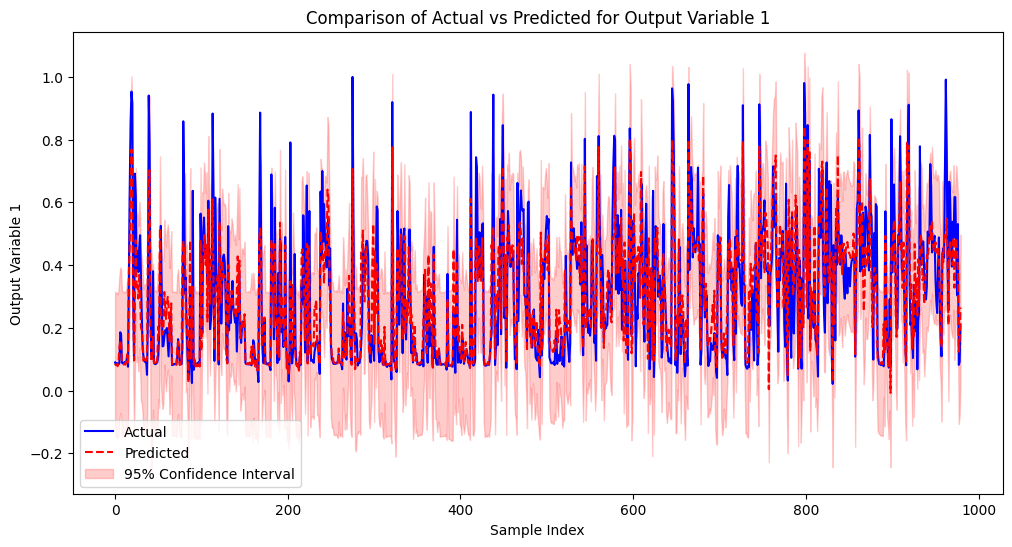

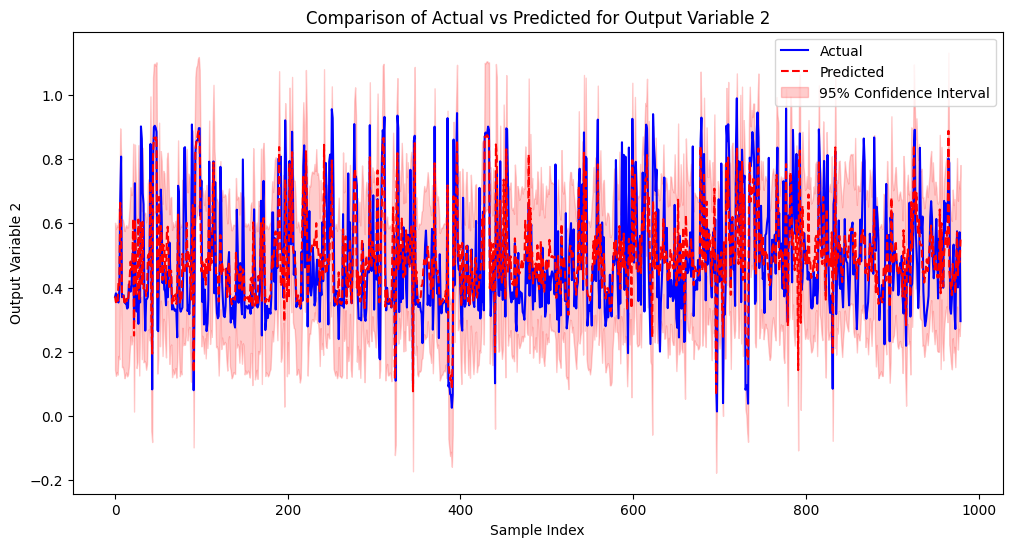

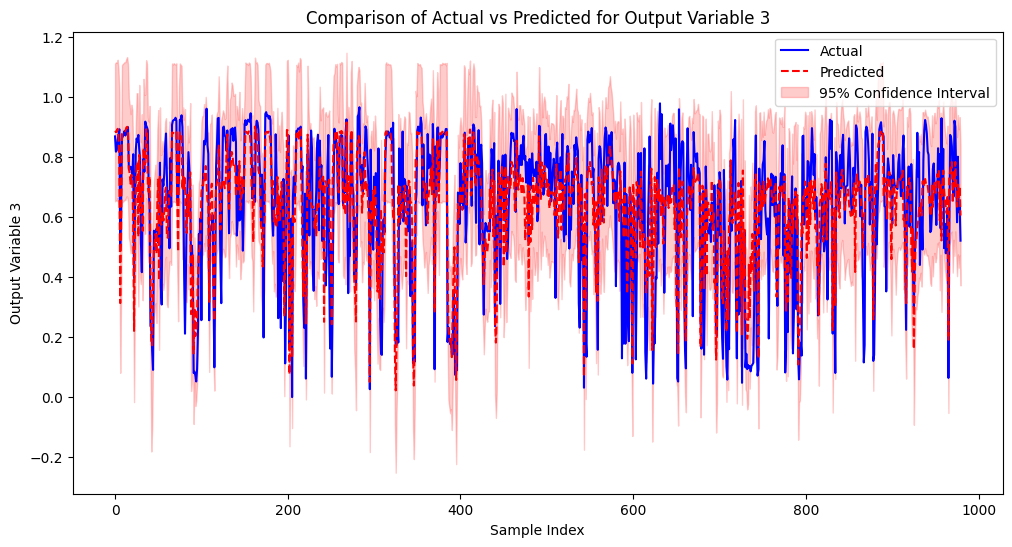

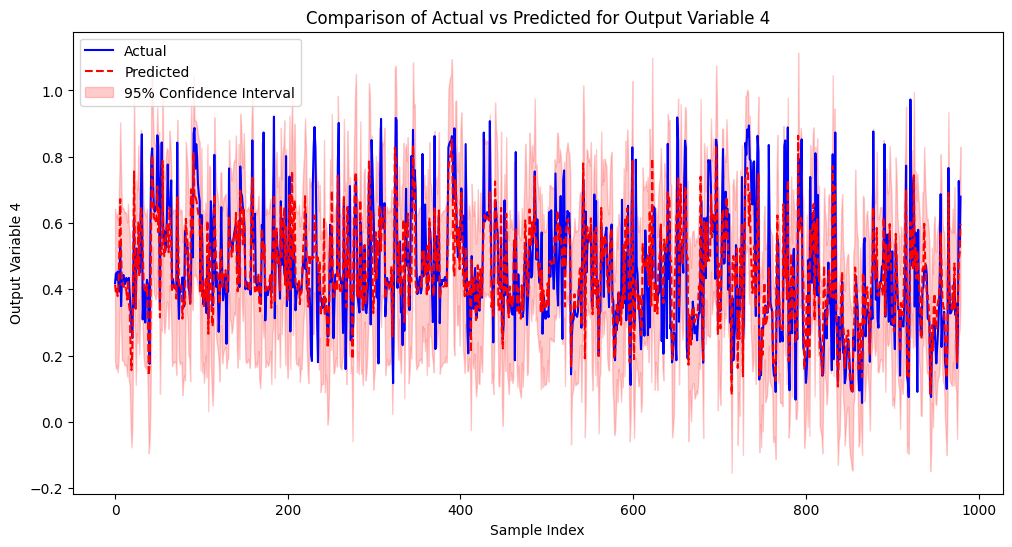

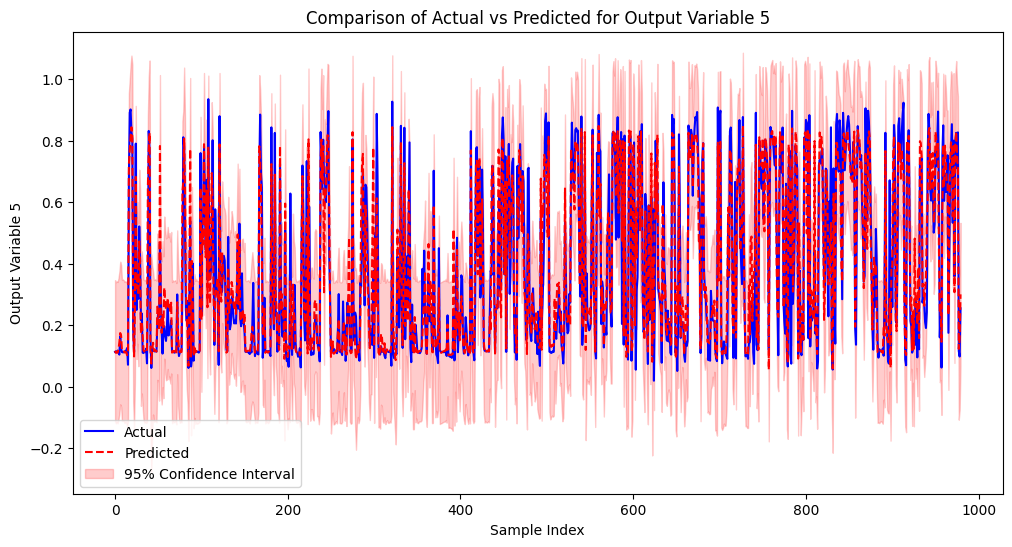

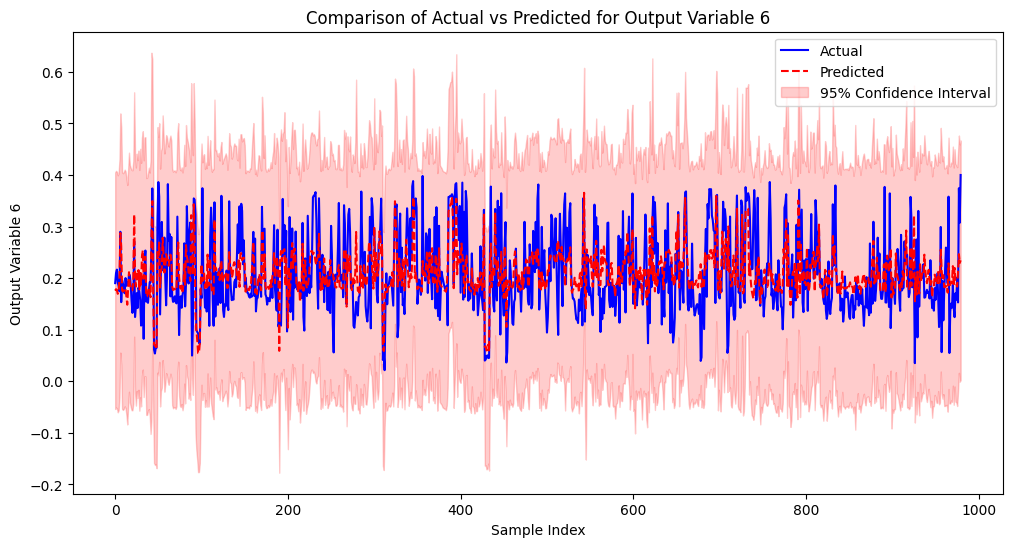

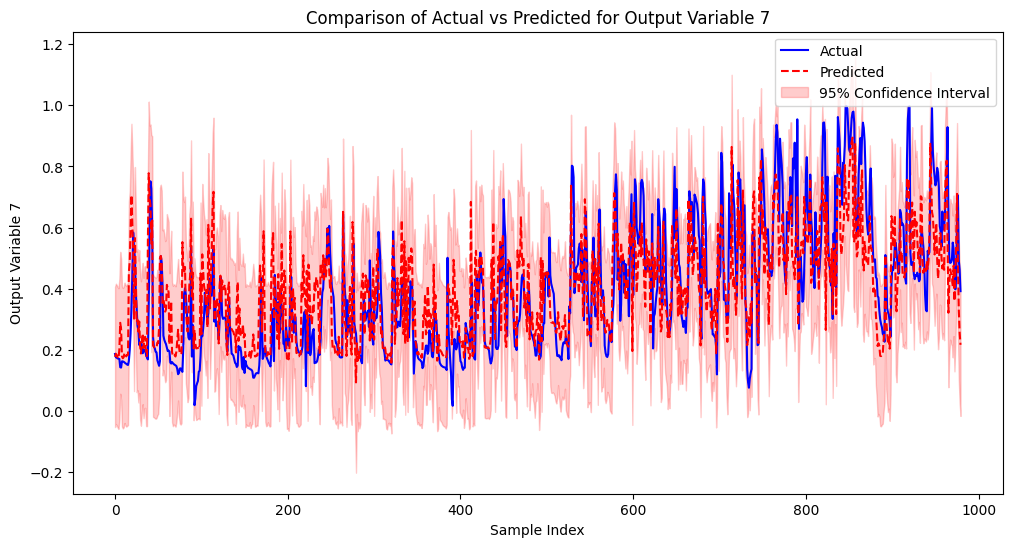

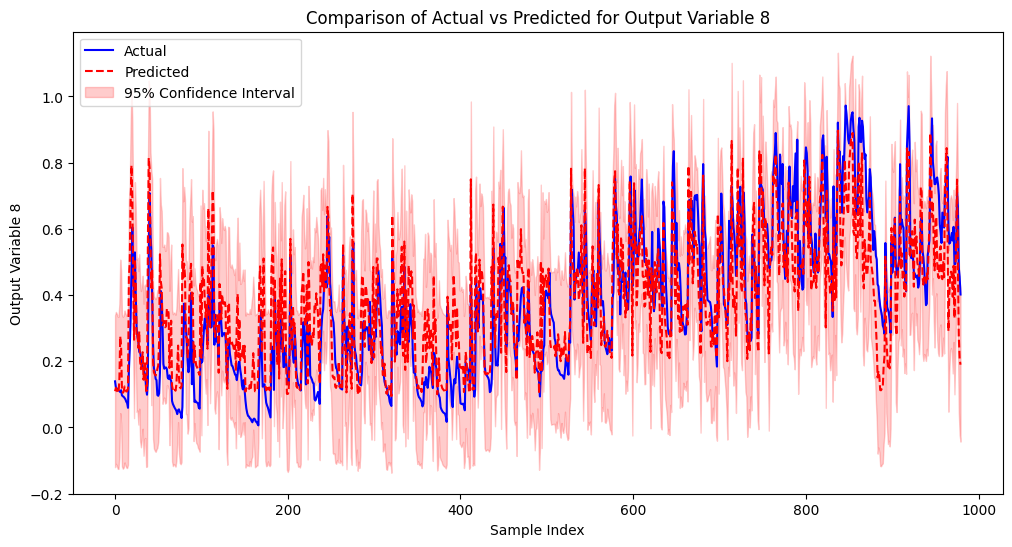

In [6]:
num_outputs = Y_pred.shape[1]

for i in range(num_outputs):
    plt.figure(figsize=(12, 6))
    plt.plot(Y_test[:, i], 'b-', label='Actual')
    plt.plot(Y_pred[:, i], 'r--', label='Predicted')
    
    # Confidence Area
    y_var = Y_var[:, i] # Use each Variance per Output Variables
    
    plt.fill_between(
        range(len(Y_pred[:, i])),
        (Y_pred[:, i] - 1.96 * np.sqrt(y_var)).flatten(),
        (Y_pred[:, i] + 1.96 * np.sqrt(y_var)).flatten(),
        color='red',
        alpha=0.2,
        label="95% Confidence Interval"
    )
    
    plt.xlabel("Sample Index")
    plt.ylabel(f"Output Variable {i+1}")
    plt.title(f"Comparison of Actual vs Predicted for Output Variable {i+1}")
    plt.legend()
    plt.show()

In [7]:
rmse_values = []

for i in range(num_outputs):
    # RMSE for each Output variables
    rmse = np.sqrt(mean_squared_error(Y_test[:, i], Y_pred[:, i]))
    rmse_values.append(rmse)
    print(f"Output Variable {i+1} - RMSE: {rmse:.4f}")

# Average RMSE
average_rmse = np.mean(rmse_values)
print(f"\nAverage RMSE across all output variables: {average_rmse:.4f}")

Output Variable 1 - RMSE: 0.1136
Output Variable 2 - RMSE: 0.1284
Output Variable 3 - RMSE: 0.1553
Output Variable 4 - RMSE: 0.1177
Output Variable 5 - RMSE: 0.1013
Output Variable 6 - RMSE: 0.0650
Output Variable 7 - RMSE: 0.1407
Output Variable 8 - RMSE: 0.1282

Average RMSE across all output variables: 0.1188


In [8]:
# Model list
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=0),
    "Support Vector Regression": SVR(kernel='rbf')
}

# RMSE Dictionary
model_rmse = {}

# Each Output Variables has each models
for model_name, model in regression_models.items():
    print(f"\nTraining {model_name}...")
    rmse_values = []

    for i in range(Y_train.shape[1]):
        # Training Each Model
        model.fit(X_train, Y_train[:, i])

        # Prediction
        Y_pred_test = model.predict(X_test)

        # RMSE
        rmse = np.sqrt(mean_squared_error(Y_test[:, i], Y_pred_test))
        rmse_values.append(rmse)
        print(f"  Output Variable {i+1} - RMSE: {rmse:.4f}")

    # Each Model's RMSE 
    avg_rmse = np.mean(rmse_values)
    model_rmse[model_name] = avg_rmse
    print(f"Average RMSE for {model_name}: {avg_rmse:.4f}")

# Average RMSE
print("\nPerformance Comparison:")
for model_name, avg_rmse in model_rmse.items():
    print(f"{model_name} - Average RMSE: {avg_rmse:.4f}")



Training Linear Regression...
  Output Variable 1 - RMSE: 0.1347
  Output Variable 2 - RMSE: 0.1529
  Output Variable 3 - RMSE: 0.1887
  Output Variable 4 - RMSE: 0.1388
  Output Variable 5 - RMSE: 0.1250
  Output Variable 6 - RMSE: 0.0750
  Output Variable 7 - RMSE: 0.1607
  Output Variable 8 - RMSE: 0.1483
Average RMSE for Linear Regression: 0.1405

Training Random Forest...
  Output Variable 1 - RMSE: 0.1172
  Output Variable 2 - RMSE: 0.1268
  Output Variable 3 - RMSE: 0.1542
  Output Variable 4 - RMSE: 0.1188
  Output Variable 5 - RMSE: 0.1049
  Output Variable 6 - RMSE: 0.0665
  Output Variable 7 - RMSE: 0.1406
  Output Variable 8 - RMSE: 0.1293
Average RMSE for Random Forest: 0.1198

Training Support Vector Regression...
  Output Variable 1 - RMSE: 0.1186
  Output Variable 2 - RMSE: 0.1349
  Output Variable 3 - RMSE: 0.1594
  Output Variable 4 - RMSE: 0.1208
  Output Variable 5 - RMSE: 0.1085
  Output Variable 6 - RMSE: 0.0721
  Output Variable 7 - RMSE: 0.1426
  Output Variabl